In [1]:
import pandas as pd
import folium
import seaborn as sns
import numpy as np
import warnings
sns.set(rc={'figure.figsize':(20, 6)})

In [12]:
warnings.filterwarnings('ignore')

In [36]:
#Trabajamos con el dataset actualizado
sadi = pd.read_csv('data/cammesa/centrales.csv', sep=",")

In [37]:
sadi.head()

,Unnamed: 0,id,Nombre,Nemo,Tipo,Potencia,Region,F_desde,F_hasta,lat,lon,provincia,Tipo_eco
0,0,639.0,P.E. ARAUCO II (ETAPA 1 Y 2),AR21EO,eolicas,99.75,NOA,2015-01-01T03:00:00Z,9999-12-01T03:00:00Z,-28.713251,-66.705385,La Rioja,Renovable
1,1,506.0,ARAUCO EOLICO,ARAUEO,eolicas,25.20,NOA,2015-01-01T03:00:00Z,9999-12-01T03:00:00Z,-28.701939,-66.752040,La Rioja,Renovable
2,2,568.0,ARAUCO EOLICO 2,ARA2EO,eolicas,25.20,CUY,2015-01-01T03:00:00Z,9999-12-01T03:00:00Z,-28.692980,-66.754425,La Rioja,Renovable
3,3,614.0,EL JUME,JUMEEO,eolicas,8.00,NOA,2015-01-01T03:00:00Z,9999-12-01T03:00:00Z,-29.419391,-63.709658,Santiago del Estero,Renovable
4,4,669.0,P.E. Achiras,ACHIEO,eolicas,48.00,CEN,2015-01-01T03:00:00Z,9999-12-01T03:00:00Z,-33.213184,-65.080059,Córdoba,Renovable


In [39]:
df_sadi = sadi[['id', 'Nombre', 'Nemo', 'Tipo', 'Potencia', 'Region', 'lat', 'lon','provincia','Tipo_eco']]
df_sadi

,id,Nombre,Nemo,Tipo,Potencia,Region,lat,lon,provincia,Tipo_eco
0,639.0,P.E. ARAUCO II (ETAPA 1 Y 2),AR21EO,eolicas,99.75,NOA,-28.713251,-66.705385,La Rioja,Renovable
1,506.0,ARAUCO EOLICO,ARAUEO,eolicas,25.20,NOA,-28.701939,-66.752040,La Rioja,Renovable
2,568.0,ARAUCO EOLICO 2,ARA2EO,eolicas,25.20,CUY,-28.692980,-66.754425,La Rioja,Renovable
3,614.0,EL JUME,JUMEEO,eolicas,8.00,NOA,-29.419391,-63.709658,Santiago del Estero,Renovable
4,669.0,P.E. Achiras,ACHIEO,eolicas,48.00,CEN,-33.213184,-65.080059,Córdoba,Renovable
...,...,...,...,...,...,...,...,...,...,...
351,734.0,C.T. ARREBEEF ENERGIA,ABEF,termicas,1.50,BSAS,-33.762503,-60.090875,Buenos Aires,No Renovable
352,630.0,G ROJO R.ENERGY,ROJO,termicas,258.00,BSAS,-33.454965,-60.281668,Buenos Aires,No Renovable
353,100.0,ACEROS PARANA,APAR,termicas,150.00,BSAS,-33.364149,-60.145681,Buenos Aires,No Renovable
354,322.0,AES-PARANA,AESP,termicas,870.00,BSAS,-33.354883,-60.171846,Buenos Aires,No Renovable


In [40]:
df_sadi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         346 non-null    float64
 1   Nombre     356 non-null    object 
 2   Nemo       346 non-null    object 
 3   Tipo       356 non-null    object 
 4   Potencia   356 non-null    float64
 5   Region     356 non-null    object 
 6   lat        356 non-null    float64
 7   lon        356 non-null    float64
 8   provincia  354 non-null    object 
 9   Tipo_eco   356 non-null    object 
dtypes: float64(4), object(6)
memory usage: 27.9+ KB


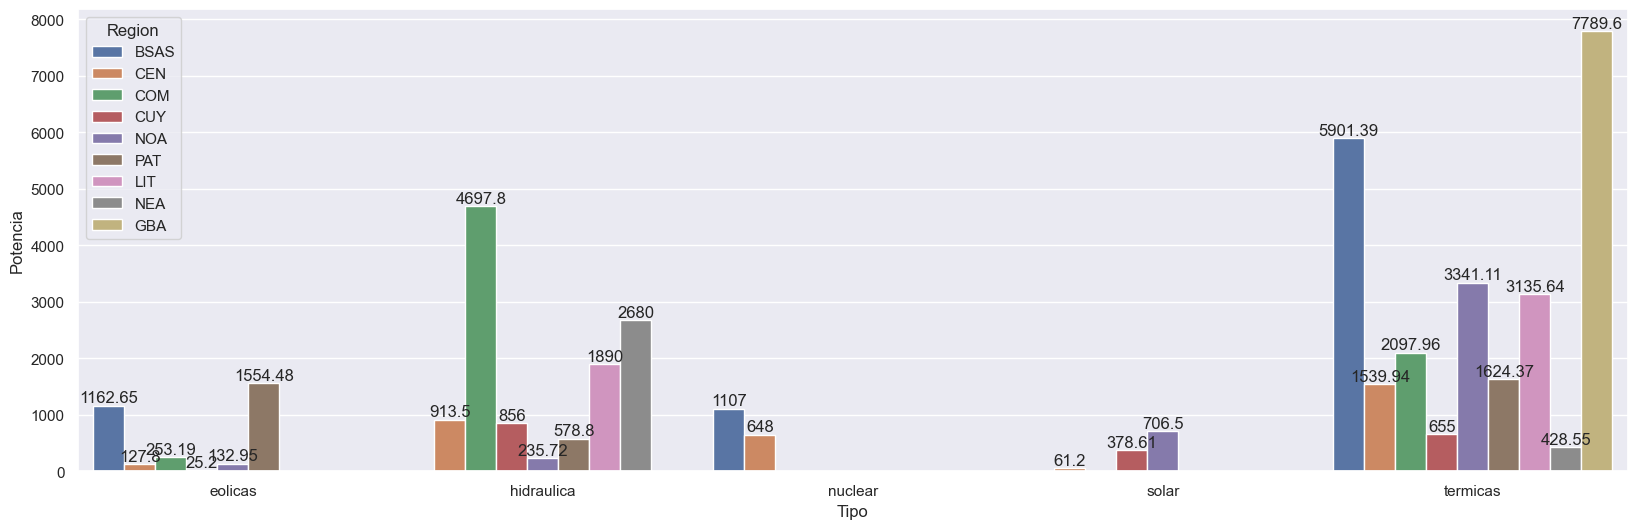

In [5]:
df_sadi_potencias = df_sadi \
    .groupby(['Tipo', 'Region']) \
    .agg({
        'Potencia': np.sum
    }) \
    .reset_index()


ax = sns.barplot(df_sadi_potencias, x='Tipo', y='Potencia', hue='Region', errorbar=None, width=0.9)
for i in ax.containers:
    ax.bar_label(i, )

In [6]:
mapa = folium.Map(location=[-34.6, -58.4], zoom_start=4)

In [9]:
df_sadi = df_sadi.dropna()

In [41]:
colores = {
    'eolicas': 'green',
    'hidraulica': 'blue',
    'nuclear': 'orange',
    'solar': 'yellow',
    'termicas': 'red',
}

for idx in range(len(df_sadi)):
    location = df_sadi.iloc[idx][['lat', 'lon']]
    folium.Marker(
        location=location,
        popup=f"{df_sadi.iloc[idx]['Tipo']}: {df_sadi.iloc[idx]['Nombre']}",
        #Cada icono tiene el color segun el tipo de central
        icon = folium.Icon(color=colores[df_sadi.iloc[idx]['Tipo']], icon='bolt', prefix='fa')
    ).add_to(mapa)

mapa

/tmp/ipykernel_26024/1307413935.py:15: UserWarning: color argument of Icon should be one of: {'darkgreen', 'pink', 'gray', 'red', 'orange', 'green', 'blue', 'cadetblue', 'purple', 'lightgray', 'darkblue', 'lightgreen', 'lightred', 'beige', 'lightblue', 'darkpurple', 'black', 'white', 'darkred'}.
  icon = folium.Icon(color=colores[df_sadi.iloc[idx]['Tipo']], icon='bolt', prefix='fa')
/tmp/ipykernel_26024/1307413935.py:15: UserWarning: color argument of Icon should be one of: {'darkgreen', 'pink', 'gray', 'red', 'orange', 'green', 'blue', 'cadetblue', 'purple', 'lightgray', 'darkblue', 'lightgreen', 'lightred', 'beige', 'lightblue', 'darkpurple', 'black', 'white', 'darkred'}.
  icon = folium.Icon(color=colores[df_sadi.iloc[idx]['Tipo']], icon='bolt', prefix='fa')
/tmp/ipykernel_26024/1307413935.py:15: UserWarning: color argument of Icon should be one of: {'darkgreen', 'pink', 'gray', 'red', 'orange', 'green', 'blue', 'cadetblue', 'purple', 'lightgray', 'darkblue', 'lightgreen', 'lightred

In [49]:
#Visualizacion de la potencia total instalada en cada region en un mapa no interactivo
df_sadi_potencias = df_sadi[['Tipo', 'Region', 'Potencia','provincia']] 
df_sadi_potencias_prov = df_sadi_potencias.groupby(['Tipo','provincia']).agg({'Potencia': np.sum}).reset_index()
df_sadi_potencias = df_sadi_potencias.groupby(['Tipo', 'Region']).agg({'Potencia': np.sum}).reset_index()

df_sadi_potencias


,Tipo,Region,Potencia
0,eolicas,BSAS,1162.65
1,eolicas,CEN,127.80
2,eolicas,COM,253.19
3,eolicas,CUY,25.20
4,eolicas,NOA,132.95
5,eolicas,PAT,1554.48
6,hidraulica,CEN,913.50
7,hidraulica,COM,4697.80
8,hidraulica,CUY,856.00
9,hidraulica,LIT,1890.00


In [47]:
df_sadi_potencias_prov

,Tipo,provincia,Potencia
0,eolicas,Buenos Aires,1162.65
1,eolicas,Chubut,1211.13
2,eolicas,Córdoba,127.80
3,eolicas,La Pampa,39.60
4,eolicas,La Rioja,150.15
5,eolicas,Neuquén,100.49
6,eolicas,Río Negro,113.10
7,eolicas,Santa Cruz,343.35
8,eolicas,Santiago del Estero,8.00
9,hidraulica,Chubut,578.80


In [6]:
#Potencia total instalada en cada provincia
df_potencia_prov = df_sadi_potencias_prov.groupby('provincia')['potencia_instalada'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), title='Potencia total instalada en cada provincia')

NameError: name 'df_sadi_potencias_prov' is not defined

In [5]:
#Abrir archivo provincias.shp y graficar
import geopandas as gpd #VER QUE ONDA ESTE IMPORT

provincias = gpd.read_file('data/provincias.shp')

NameError: name 'gpd' is not defined

In [ ]:
#Realizar un ratio de la potencia instalada que es del tipo_eco renovable sobre la potencia total instalada por provincia con la informacion centrales.csv

